# Téléchargement de la Dataset 
Electron Microscopy Dataset : https://www.epfl.ch/labs/cvlab/data/data-em/

In [ ]:
!wget https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training.tif

--2022-02-02 15:39:10--  https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training.tif
Resolving documents.epfl.ch (documents.epfl.ch)... 128.178.222.197, 2001:620:618:1de:1:80b2:dec5:1
Connecting to documents.epfl.ch (documents.epfl.ch)|128.178.222.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129919357 (124M) [application/octet-stream]
Saving to: ‘training.tif’

training.tif        100%[===================>] 123.90M   310KB/s    in 2m 53s  

2022-02-02 15:42:04 (735 KB/s) - ‘training.tif’ saved [129919357/129919357]



In [ ]:
!wget https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training_groundtruth.tif

--2022-02-02 15:42:04--  https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training_groundtruth.tif
Resolving documents.epfl.ch (documents.epfl.ch)... 128.178.222.197, 2001:620:618:1de:1:80b2:dec5:1
Connecting to documents.epfl.ch (documents.epfl.ch)|128.178.222.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129919357 (124M) [application/octet-stream]
Saving to: ‘training_groundtruth.tif’

training_groundtrut 100%[===================>] 123.90M  1.07MB/s    in 2m 41s  

2022-02-02 15:44:46 (788 KB/s) - ‘training_groundtruth.tif’ saved [129919357/129919357]



In [ ]:
!pip install patchify

# Prétraitement des images

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff

# Création des répertoires qui contiendront les images et les masques
os.mkdir("patches/")
os.mkdir("patches/images/")
os.mkdir("patches/masks/")

# Chargement de la Dataset brute
large_image_stack = tiff.imread('training.tif')
large_mask_stack = tiff.imread('training_groundtruth.tif')

# Rangement des images dans le dossier "patches/images/"
for img in range(large_image_stack.shape[0]):
    large_image = large_image_stack[img]
    patches_img = patchify(large_image, (256, 256), step=256)
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):    
            single_patch_img = patches_img[i,j,:,:]
            tiff.imwrite('patches/images/' + 'image_' + str(img) + '_' + str(i)+str(j)+ ".tif", single_patch_img)
            
# Rangement des images dans le dossier "patches/masks/"
for msk in range(large_mask_stack.shape[0]):
    large_mask = large_mask_stack[msk]
    patches_mask = patchify(large_mask, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            tiff.imwrite('patches/masks/' + 'mask_' + str(msk) + '_' + str(i)+str(j)+ ".tif", single_patch_mask)
            single_patch_mask = single_patch_mask / 255.

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import glob

In [ ]:
# Chargement, tri et stockage dans une liste des paths de chaque image
image_names = glob.glob("patches/images/*.tif")
image_names.sort()
image_names

['patches/images/image_0_00.tif',
 'patches/images/image_0_01.tif',
 'patches/images/image_0_02.tif',
 'patches/images/image_0_03.tif',
 'patches/images/image_0_10.tif',
 'patches/images/image_0_11.tif',
 'patches/images/image_0_12.tif',
 'patches/images/image_0_13.tif',
 'patches/images/image_0_20.tif',
 'patches/images/image_0_21.tif',
 'patches/images/image_0_22.tif',
 'patches/images/image_0_23.tif',
 'patches/images/image_100_00.tif',
 'patches/images/image_100_01.tif',
 'patches/images/image_100_02.tif',
 'patches/images/image_100_03.tif',
 'patches/images/image_100_10.tif',
 'patches/images/image_100_11.tif',
 'patches/images/image_100_12.tif',
 'patches/images/image_100_13.tif',
 'patches/images/image_100_20.tif',
 'patches/images/image_100_21.tif',
 'patches/images/image_100_22.tif',
 'patches/images/image_100_23.tif',
 'patches/images/image_101_00.tif',
 'patches/images/image_101_01.tif',
 'patches/images/image_101_02.tif',
 'patches/images/image_101_03.tif',
 'patches/images

In [ ]:
# Chargement, tri et stockage dans une liste des paths de chaque masque
mask_names = glob.glob("patches/masks/*.tif")
mask_names.sort()
mask_names

['patches/masks/mask_0_00.tif',
 'patches/masks/mask_0_01.tif',
 'patches/masks/mask_0_02.tif',
 'patches/masks/mask_0_03.tif',
 'patches/masks/mask_0_10.tif',
 'patches/masks/mask_0_11.tif',
 'patches/masks/mask_0_12.tif',
 'patches/masks/mask_0_13.tif',
 'patches/masks/mask_0_20.tif',
 'patches/masks/mask_0_21.tif',
 'patches/masks/mask_0_22.tif',
 'patches/masks/mask_0_23.tif',
 'patches/masks/mask_100_00.tif',
 'patches/masks/mask_100_01.tif',
 'patches/masks/mask_100_02.tif',
 'patches/masks/mask_100_03.tif',
 'patches/masks/mask_100_10.tif',
 'patches/masks/mask_100_11.tif',
 'patches/masks/mask_100_12.tif',
 'patches/masks/mask_100_13.tif',
 'patches/masks/mask_100_20.tif',
 'patches/masks/mask_100_21.tif',
 'patches/masks/mask_100_22.tif',
 'patches/masks/mask_100_23.tif',
 'patches/masks/mask_101_00.tif',
 'patches/masks/mask_101_01.tif',
 'patches/masks/mask_101_02.tif',
 'patches/masks/mask_101_03.tif',
 'patches/masks/mask_101_10.tif',
 'patches/masks/mask_101_11.tif',
 'pa

In [ ]:
print(f"Nombre d'images : {len(image_names)}")
print(f"Nombre de masques : {len(mask_names)}")

Nombre d'images : 1980
Nombre de masques : 1980


In [ ]:
# Lecture et stockage des images
images = [cv2.imread(img, 0) for img in image_names]
masks = [cv2.imread(img, 0) for img in mask_names]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
# Normaliser les images
image_dataset = image_dataset /255. 
# Mettre les valeurs des masques en 0-1.
mask_dataset = mask_dataset /255. 

In [ ]:
# Split les données en données d'entraînement/test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20)

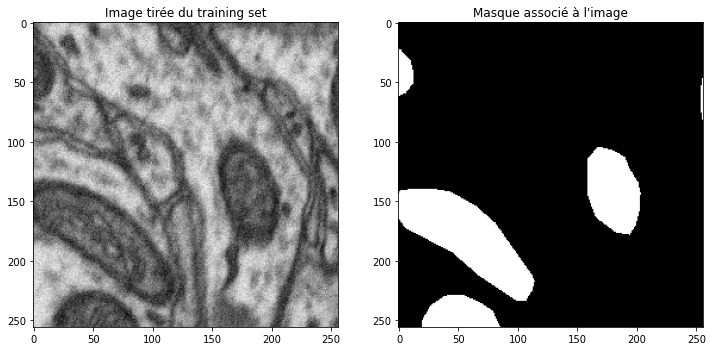

In [ ]:
# Vérification des images/masques
import random

image_number = random.randint(0, len(X_train)-1)   # image aléatoire
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.title('Image tirée du training set')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.title("Masque associé à l'image")
plt.show()

# Construction et entrainement du modèle U-Net

In [ ]:
# pour construire le modèle U-Net
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

In [ ]:
# Architecture d'un mini bloc Encodeur

def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True):
    """
    Ce bloc d'encodeur utilise plusieurs couche de Convolution, du Max Pooling, des activations reLu pour créer une architecture d'apprentissage
    On peut ajouter un Dropout pour éviter l'overfitting 
    Le bloc renvoie les valeurs d'activation de la couche suivante ainsi qu'une skip connection qui sera utilisée dans le décodeur.
    """
    # Ajout de 2 couches de convolution avec activation reLu et initialisation HeNormal
    # Une initialisation correcte permet d'éviter le problème des gradients explosifs
    conv = Conv2D(n_filters, 
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(conv)
    
    # Le Batch Normalization va normaliser la sortie de la dernière couche en fonction de la moyenne et de l'écart-type du batch.
    conv = BatchNormalization()(conv, training=False)

    # En cas d'overfitting, le dropout va régulariser le calcul de la perte et du gradient pour réduire l'influence des poids sur la sortie.
    if dropout_prob > 0:     
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    # Le pooling réduit la taille de l'image tout en conservant le même nombre de canaux.
    # le Max Pooling considère le maximum de chaque bloc d'entrée pour le calcul de la sortie et utilise un pas de 2 pour traverser l'image d'entrée.
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv)    
    else:
        next_layer = conv

    # La skip connection sera entrée dans la couche décodeur pour éviter la perte d'information pendant les convolutions de transposition      
    skip_connection = conv
    
    return next_layer, skip_connection

In [ ]:
# Architecture d'un mini bloc Décodeur

def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=32):
    """
      Le bloc décodeur utilise d'abord la convolution de transposition pour augmenter la taille de l'image, 
    puis fusionne le résultat avec les résultats de la couche de saut du bloc encodeur.
      L'ajout de deux convolutions avec le même padding permet d'augmenter la profondeur du réseau pour de meilleures prédictions.
      La fonction renvoie la sortie de la couche décodée
    """

    # une couche de convolution de transposition pour augmenter la taille de l'image.
    up = Conv2DTranspose(
                 n_filters,
                 (3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(prev_layer_input)

    # Fusionner avec le skip layer du bloc précédent pour éviter la perte d'informations.
    merge = concatenate([up, skip_layer_input], axis=3)
    
    # Ajout de 2 couches de Convolutin avec activation ReLU et initialisation HeNormal pour un traitement ultérieur.
    # Les paramètres de la fonction sont similaires à ceux de l'encodeur.
    conv = Conv2D(n_filters, 
                 3,     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters,
                 3,   # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(conv)
    return conv

In [ ]:
# Architecture finale du modèle U-Net

def UNetCompiled(input_size=(128, 128, 3), n_filters=32, n_classes=3):
    """
    Combine l'encodeur et le décodeur
    Retourne le model U-Net en sortie
    """
    # La taille d'entrée représente la taille d'une image (la taille utilisée lors du prétraitement). 
    inputs = Input(input_size)
    
    # L'encodeur comprend plusieurs mini-blocs convolutifs avec différents paramètres de maxpooling, de dropout et de filtre.
    # Les filtres augmentent au fur et à mesure que nous pénétrons dans le réseau, ce qui augmente le nombre de canaux de l'image. 
    cblock1 = EncoderMiniBlock(inputs, n_filters,dropout_prob=0, max_pooling=True)
    cblock2 = EncoderMiniBlock(cblock1[0],n_filters*2,dropout_prob=0, max_pooling=True)
    cblock3 = EncoderMiniBlock(cblock2[0], n_filters*4,dropout_prob=0, max_pooling=True)
    cblock4 = EncoderMiniBlock(cblock3[0], n_filters*8,dropout_prob=0.3, max_pooling=True)
    cblock5 = EncoderMiniBlock(cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False) 
    
    # Le décodeur comprend plusieurs mini-blocs avec un nombre décroissant de filtres.
    # Les skip connections sont données comme entrée au décodeur.
    ublock6 = DecoderMiniBlock(cblock5[0], cblock4[1],  n_filters * 8)
    ublock7 = DecoderMiniBlock(ublock6, cblock3[1],  n_filters * 4)
    ublock8 = DecoderMiniBlock(ublock7, cblock2[1],  n_filters * 2)
    ublock9 = DecoderMiniBlock(ublock8, cblock1[1],  n_filters)

    # On complète le modèle avec 1 couche de convolution 3x3.
    # Suivi d'une couche de convolution 1x1 pour avoir l'image dans la taille désirée.
    # Le nombre de canaux sera égal au nombre de classes de sortie
    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)
    
    # Définition du modèle
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
input_shape

(256, 256, 1)

In [ ]:
# Création du modèle
model = UNetCompiled(input_size=input_shape, n_filters=32, n_classes=3)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# Compilation du modèle avec l'optimiseur Adam et la Sparse Categorical Crossentropy comme loss
model.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Fit du modèle
results = model.fit(X_train, y_train, batch_size=16, epochs=15, verbose=1, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/15
99/99 [==============================] - 55s 382ms/step - loss: 0.2198 - accuracy: 0.9367 - val_loss: 0.1866 - val_accuracy: 0.9379
Epoch 2/15
99/99 [==============================] - 36s 361ms/step - loss: 0.1241 - accuracy: 0.9513 - val_loss: 0.0790 - val_accuracy: 0.9668
Epoch 3/15
99/99 [==============================] - 38s 380ms/step - loss: 0.0638 - accuracy: 0.9738 - val_loss: 0.0484 - val_accuracy: 0.9810
Epoch 4/15
99/99 [==============================] - 37s 377ms/step - loss: 0.0593 - accuracy: 0.9754 - val_loss: 0.0560 - val_accuracy: 0.9777
Epoch 5/15
99/99 [==============================] - 37s 376ms/step - loss: 0.0349 - accuracy: 0.9863 - val_loss: 0.0283 - val_accuracy: 0.9888
Epoch 6/15
99/99 [==============================] - 37s 378ms/step - loss: 0.0249 - accuracy: 0.9902 - val_loss: 0.0211 - val_accuracy: 0.9915
Epoch 7/15
99/99 [==============================] - 37s 377ms/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0220 - val_accuracy: 0.9914

In [ ]:
# Enregistrement du modèle
model.save('mitochondria_segmentation.hdf5')

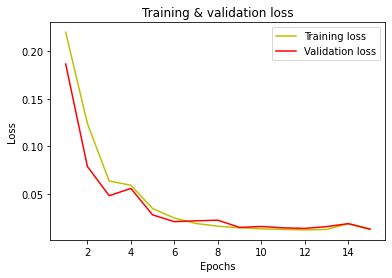

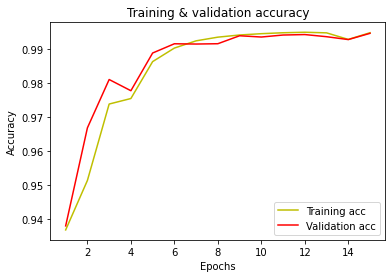

In [ ]:
# Visualisation de l'accuracy et de la loss après chaque epoch
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Déploiement du modèle

In [ ]:
# Prédiction sur les données de test
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

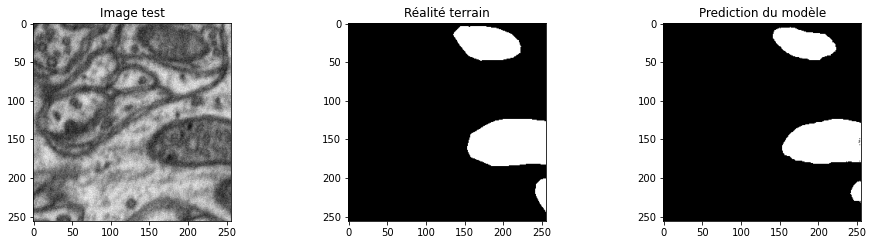

In [ ]:
# Comparaison et visualisation de la prédiction du modèle

threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)   # Image de test aléatoire
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] < threshold).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Image test')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Réalité terrain')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction du modèle')
plt.imshow(prediction, cmap='gray')

plt.show()